# Magic Gamma Classification

In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import  RandomOverSampler

In [9]:
cols_names = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']

In [10]:
data = pd.read_csv('magic04.data',names=cols_names)
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [11]:
data.shape

(19020, 11)

In [12]:
data['class'].unique()

array(['g', 'h'], dtype=object)

In [13]:
data['class'] = (data['class']=='g').astype(int)

In [14]:
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [15]:
data['class'].unique()

array([1, 0])

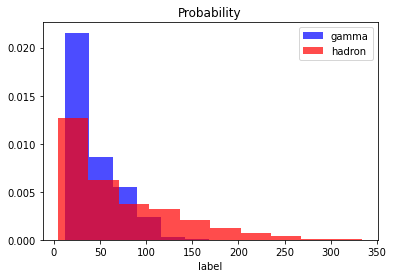

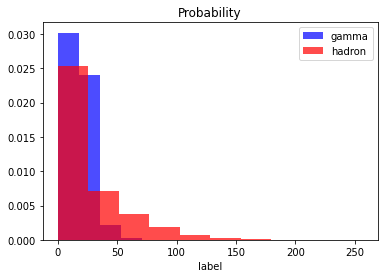

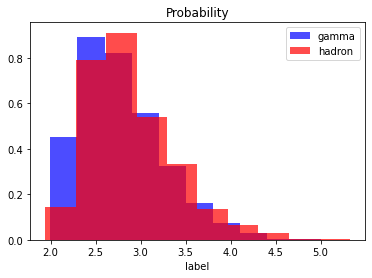

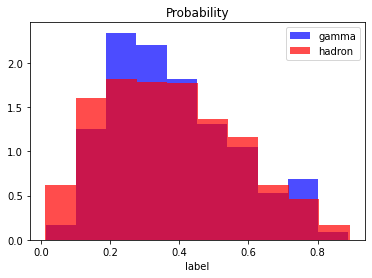

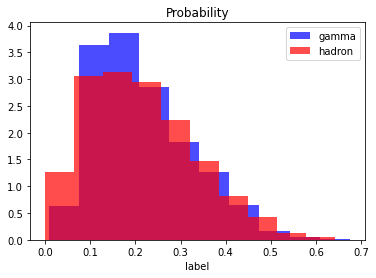

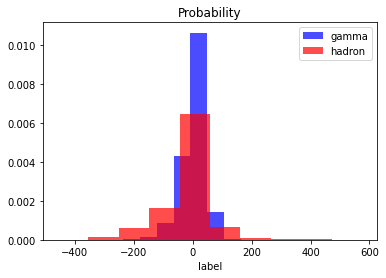

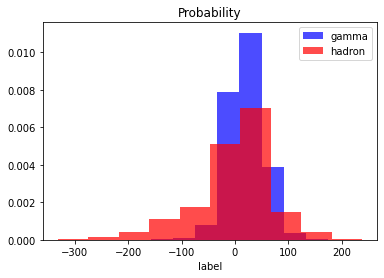

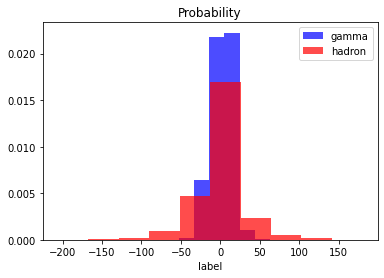

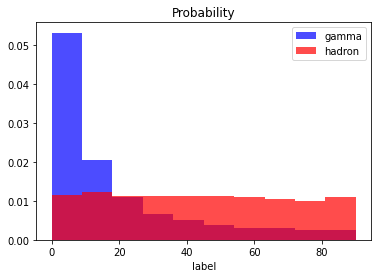

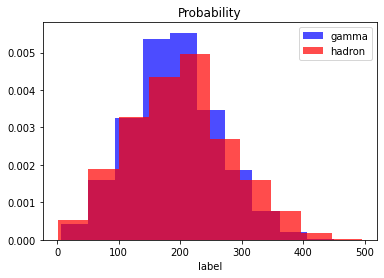

In [16]:
for label in cols_names[:-1]:
  plt.hist(data[data['class']==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(data[data['class']==0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title('Probability')
  plt.xlabel('label')
  plt.legend()
  plt.show()


# Train, Validation,Test Datasets

In [17]:
train,valid,test = np.split(data.sample(frac=1),[int(0.6*len(data)),int(0.8*len(data))])

In [18]:
def scale_dataset(dataframe,oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)

  data = np.hstack((X,np.reshape(y,(-1,1))))

  return data,X,y




In [19]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier


In [21]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
y_pred = knn_model.predict(X_test)

In [23]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
from sklearn.metrics import classification_report

In [25]:
print('The Report of our model is: \n\n',classification_report(y_test,y_pred))

The Report of our model is: 

               precision    recall  f1-score   support

           0       0.73      0.73      0.73      1300
           1       0.86      0.86      0.86      2504

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [28]:
y_pred = nb_model.predict(X_test)

In [29]:
print('The Report of our model is: \n\n',classification_report(y_test,y_pred))

The Report of our model is: 

               precision    recall  f1-score   support

           0       0.70      0.42      0.52      1300
           1       0.75      0.91      0.82      2504

    accuracy                           0.74      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.74      0.72      3804



# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression


In [31]:
Log_model = LogisticRegression()
Log_model.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred = Log_model.predict(X_test)

In [33]:
print('The Report of our model is: \n\n',classification_report(y_test,y_pred))

The Report of our model is: 

               precision    recall  f1-score   support

           0       0.68      0.72      0.70      1300
           1       0.85      0.82      0.83      2504

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



#SVM

In [34]:
from sklearn.svm import SVC

In [35]:
Svm_model = SVC()
Svm_model.fit(X_train,y_train)

SVC()

In [36]:
y_pred = Svm_model.predict(X_test)

In [37]:
print('The Report of our model is: \n\n',classification_report(y_test,y_pred))

The Report of our model is: 

               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1300
           1       0.89      0.90      0.90      2504

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



# Neural Network

In [38]:
import tensorflow as tf

In [39]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [40]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

In [41]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

Output hidden; open in https://colab.research.google.com to view.